Título: Voronoi Binning

Data: 23/03/2020
    
Obj: Aplicar o algoritmo de Voronoi para aumentar a razão sinal/ruído em spaxes que possam ser aglotinados. Baseado no código de Michele Cappellari: The Voronoi binning method (VorBin) disponível em: https://www-astro.physics.ox.ac.uk/~mxc/software/#binning e descrito em https://ui.adsabs.harvard.edu/abs/2003MNRAS.342..345C

Autor: Carlos Roberto

In [3]:
from os import path
import numpy as np
import matplotlib.pyplot as plt

import vorbin
from vorbin.voronoi_2d_binning import voronoi_2d_binning

data_folder = "/home/carlos/Documents/GitHub/Master-Degree/SDP81/Dynamics/New pPXF/"

Bin-accretion...
1  /  14
2  /  14
3  /  14
4  /  14
5  /  14
6  /  14
7  /  14
8  /  14
9  /  14
10  /  14
11  /  14
12  /  14
13  /  14
14  /  14
15  /  14
16  /  14
17  /  14
18  /  14
19  /  14
19  initial bins.
Reassign bad bins...
12  good bins.
Unbinned pixels:  0  /  547
Fractional S/N scatter (%): 42.841801563071805
Elapsed time accretion: 0.06 seconds
Elapsed time optimization: 0.00 seconds


/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


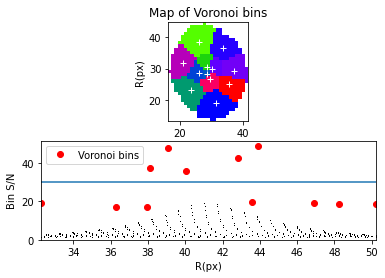

In [4]:
#y: é a posição y de onde foi extraído o sinal e o ruído
#x: é a posição x de onde foi extraído o sinal e o ruído
#signal: é o sinal do spaxel (y,x)
#noise: é o ruído do spaxel (y,x)

y, x, signal, noise = np.loadtxt("GoodPixels.txt").T #Lê a saída do código SNR
targetSN = 30 #Threshold pretendido

    # Perform the actual computation. The vectors
    # (binNum, xNode, yNode, xBar, yBar, sn, nPixels, scale)
    # are all generated in *output*
    #
binNum, xNode, yNode, xBar, yBar, sn, nPixels, scale = voronoi_2d_binning(x, y, signal, 
                                                                          noise, targetSN, plot=1, quiet=0, wvt=False, cvt=False)

    # Save to a text file the initial coordinates of each pixel together
    # with the corresponding bin number computed by this procedure.
    # binNum uniquely specifies the bins and for this reason it is the only
    # number required for any subsequent calculation on the bins.
    #
np.savetxt('Voronoi_OutPut.txt', np.column_stack([y, x, binNum]),header="y_px \t x_px \t Vorbin_Id", fmt=b'%10.6f %10.6f %8i')
plt.subplot(211)
plt.xlabel('R(px)')
plt.ylabel('R(px)')
plt.subplot(212)
plt.xlabel('R(px)')
plt.savefig(data_folder+'Data/Voronoi_30/Vorbin.png', format='png')

#Essas são as novas posições dos spaxels binnados

#print(xBar)
#print(yBar)

In [5]:
(xNode - 29)*0.2

array([-0.06666667, -0.55      , -0.1       , -1.55180723, -0.56363636,
        0.94444444,  0.25      ,  1.59622642,  0.12      ,  1.32631579,
       -1.06176471,  0.50526316])

In [6]:
(yNode - 29)*0.2

array([-0.13333333, -0.075     ,  0.3       ,  0.54939759,  1.83896104,
        1.46666667,  0.2       ,  0.06415094, -0.44      , -0.78947368,
       -1.15      , -1.95964912])